# Identificación de Bases de Datos.


Los datos para nuestro proyecto se encuentran en las bases de datos del Servicio Geologico Colombiano.

* Fuente Primaria: 	Datos geoquímicos de suelos, rocas y sedimentos publicados en bases de datos libres del Servicio Geológico Colombiano (SGC).
* Enlace de Descarga:	https://www2.sgc.gov.co/sgc/mapas/Paginas/Bases-Datos.aspx 
* Licencia	Los datos provienen de bases de datos libres.

## Importar Datos desde MS Acces.

Vamos a importar la tabla con los datos del muestreo del sistema Geologico Colombiano el cúal se encuentra en un archivo de bases de datos de Microsoft Acces para procesamiento (ETL) y los vamos a cargar al DataFrame (df_MuestrasGeoquimicas2012) . Posteriormente vamos a cargar los datos a una BD de My SQL.

In [ ]:
import pyodbc
import pandas as pd


# Ruta de tu archivo .mdb
db_file = r"C:\Users\luisx\OneDrive\CURSO_ANALISIS_DATOS_U_DE_A\Proyecto\Base_Datos_GeoQuimica.mdb"

# Conexión con el driver de Access
cnxn = pyodbc.connect(
    r"DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};"
    f"DBQ={db_file};"
)

# Leer la tabla directamente a un DataFrame
df_MuestrasGeoquimicas2012 = pd.read_sql("SELECT * FROM muestras_analisis2012", cnxn)
#WHERE
#    (((muestras_analisis2012.Li_perc) IS NOT NULL))
#    OR (((muestras_analisis2012.Li_ppb) IS NOT NULL))
#    OR (((muestras_analisis2012.Li_ppm) IS NOT NULL));

# Cerrar conexión
cnxn.close()

print(df_MuestrasGeoquimicas2012.head())

C:\Users\luisx\AppData\Local\Temp\ipykernel_19008\1314504602.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_MuestrasGeoquimicas2012 = pd.read_sql("SELECT * FROM muestras_analisis2012", cnxn)


   OBJECTID ID_PCT ID_MST   numero_campo codigo_estandar     codigo_igm  \
0        19   None   None  4-IV-D-SU-10             None  4-IV-D-SU-10    
1        20   None   None     5-I-A-SU-1            None     5-I-A-SU-1   
2        21   None   None     5-I-A-SU-2            None     5-I-A-SU-2   
3        25   None   None    5-I-D-SU-12            None    5-I-D-SU-12   
4        26   None   None    5-I-D-SU-13            None    5-I-D-SU-13   

  tipo_subtipo tipo_muestra subtipo_muestra coord_este_bogota  ... Y_ppm  \
0         None    SU: Suelo            None           1205403  ...  None   
1         None    SU: Suelo            None           1210977  ...  None   
2         None    SU: Suelo            None           1213011  ...  None   
3         None    SU: Suelo            None           1225368  ...  None   
4         None    SU: Suelo            None           1228796  ...  None   

   Yb_ppb  Yb_ppm  Zn_perc  Zn_ppb Zn_ppm Zr_perc  Zr_ppb  Zr_ppm  \
0    None    None     N

In [4]:
print(df_MuestrasGeoquimicas2012.columns)
print(df_MuestrasGeoquimicas2012.info())


Index(['OBJECTID', 'ID_PCT', 'ID_MST', 'numero_campo', 'codigo_estandar',
       'codigo_igm', 'tipo_subtipo', 'tipo_muestra', 'subtipo_muestra',
       'coord_este_bogota',
       ...
       'Y_ppm', 'Yb_ppb', 'Yb_ppm', 'Zn_perc', 'Zn_ppb', 'Zn_ppm', 'Zr_perc',
       'Zr_ppb', 'Zr_ppm', 'Shape'],
      dtype='object', length=233)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168656 entries, 0 to 168655
Columns: 233 entries, OBJECTID to Shape
dtypes: float64(9), int64(1), object(223)
memory usage: 299.8+ MB
None


## Transformación 1

Despues de cargar los datos al Data Frame "df_MuestrasGeoquimicas2012" vamos a seleccionar los datos que se requieren para el analisis de datos, en este caso, la pregunta a responder ¿Podemos predecir las concentraciones de litio en una muestra geológica a partir de mediciones de otros elementos presentes en la muestra? para esto solo podemos usar las muestras que contengan concetraciones de Litio para analizar. Partimos de un total de 168.655.

In [6]:
# Transformación
df_MuestrasGeoquimicas2012_Litio = df_MuestrasGeoquimicas2012[
    (df_MuestrasGeoquimicas2012['Li_ppm'].notna()) |
    (df_MuestrasGeoquimicas2012['Li_perc'].notna()) |
    (df_MuestrasGeoquimicas2012['Li_ppb'].notna())
].copy()

print(f"Número de muestras con concentración de Litio: {len(df_MuestrasGeoquimicas2012_Litio)}")
print(f"Número de muestras con columnas {len(df_MuestrasGeoquimicas2012_Litio.columns)}")
print(list(df_MuestrasGeoquimicas2012_Litio.columns))
df_MuestrasGeoquimicas2012_Litio.head()

Número de muestras con concentración de Litio: 4096
Número de muestras con columnas 233
['OBJECTID', 'ID_PCT', 'ID_MST', 'numero_campo', 'codigo_estandar', 'codigo_igm', 'tipo_subtipo', 'tipo_muestra', 'subtipo_muestra', 'coord_este_bogota', 'coord_norte_bogota', 'coord_este1_bta', 'coord_norte1_bta', 'latitud', 'longitud', 'altitud', 'origen_coord_original', 'coord_este_original', 'coord_norte_original', 'fecha', 'testigo', 'profundidad', 'profundidad_mayor', 'escala_muestreo', 'plancha', 'cuenca', 'subcuenca', 'tipo_celda', 'pais', 'departamento', 'municipio', 'localidad', 'ubicacion_geografica', 'proyecto', 'responsable', 'informe', 'ataque', 'malla', 'Preconcentracion', 'Preservación', 'Pulverizado', 'Secado', 'Tamizado', 'Triturado', 'tecnica_medicion', 'Ag_perc', 'Ag_ppb', 'Ag_ppm', 'Al_perc', 'Al_ppb', 'Al_ppm', 'As_perc', 'As_ppb', 'As_ppm', 'Au_perc', 'Au_ppb', 'Au_ppm', 'B_ppb', 'B_ppm', 'Ba_perc', 'Ba_ppb', 'Ba_ppm', 'Be_perc', 'Be_ppb', 'Be_ppm', 'Bi_perc', 'Bi_ppb', 'Bi_pp

,OBJECTID,ID_PCT,ID_MST,numero_campo,codigo_estandar,codigo_igm,tipo_subtipo,tipo_muestra,subtipo_muestra,coord_este_bogota,...,Y_ppm,Yb_ppb,Yb_ppm,Zn_perc,Zn_ppb,Zn_ppm,Zr_perc,Zr_ppb,Zr_ppm,Shape
1647,1624,6545,10107,None,EAG-3934-R,56680,Roca:,R: Roca,None,732293,...,"34,724182",None,"1,172009",None,None,"80,760645",None,None,"21,313103",b'\x01\x00\x00\x00l\x88\xfb\xff\tY&A\xe3\x87\x...
1713,1681,6547,10109,None,EAG-3961-R,56682,Roca:,R: Roca,None,734981,...,24,None,"1,922911",None,None,80,None,None,"79,142397",b'\x01\x00\x00\x00\x14\x81\xe1\xff\tn&A\xff\x8...
15450,15367,106055,116047,None,ERX-0003-RF,ERX-0003,Roca: Fragmentos o esquirlas de roca,R: Roca,Fragmentos o esquirlas de roca,804993,...,"1,9",None,None,None,None,48,None,None,"2,6",b'\x01\x00\x00\x00\x84\xb6\xe3\xff\x01\x91(A\x...
15451,15368,106056,116048,None,ERX-0030-RF,ERX-0030,Roca: Fragmentos o esquirlas de roca,R: Roca,Fragmentos o esquirlas de roca,810060,...,"21,5",None,None,None,None,480,None,None,"10,9",b'\x01\x00\x00\x00p\xfd\xe2\xff\x97\xb8(A\xd3\...
15452,15369,106057,116049,None,ERX-0031-RF,ERX-0031,Roca: Fragmentos o esquirlas de roca,R: Roca,Fragmentos o esquirlas de roca,809901,...,"42,6",None,None,None,None,157,None,None,"4,6",b'\x01\x00\x00\x00T\xa8\xe8\xffY\xb7(A\x0b)\xf...


## Transformación 2.

Vamos a unificar las columnas que continen el elemento en Perc a ppm y los que estan en Ppb a ppm.

In [ ]:
# Vamos a crear una función que unifique las columnas que contienen el mismo elemento en diferentes unidades (ppm, ppb, perc) a una sola columna en ppm.
import numpy as np
def resumir_elementos(df):
    print("Resumiendo elementos químicos...")

    sufijos = ("_perc", "_ppb", "_ppm")
    columnas_quimicas = [col for col in df.columns if col.endswith(sufijos)]
    columnas_no_quimicas = [col for col in df.columns if not col.endswith(sufijos)]
    print(f"Columnas químicas detectadas: {columnas_quimicas}")
   
    # Detectar los elementos (antes del "_")
    elementos = sorted(set(col.split("_")[0] for col in columnas_quimicas))

    print(f"Elementos detectados: {elementos}")
    df_resultado = df[columnas_no_quimicas].copy()
    
    # Crear diccionario para las nuevas columnas ppm
    nuevos_datos = {}

    for elem in elementos:
        # Seleccionar columnas de ese elemento
        cols_elem = [c for c in columnas_quimicas if c.startswith(elem + "_")]
        if not cols_elem:
            continue
    
        # Inicializar acumulador
        suma_ppm = pd.Series(0, index=df.index, dtype="float64")

        for col in cols_elem:
            # Convertir a numérico
            # 👉 Convertir respetando coma como separador decimal
            valores = pd.to_numeric(
                df[col].astype(str).str.replace(",", "."),
                errors="coerce"
            )
            
            if col.endswith("_perc"):
                suma_ppm += valores.fillna(0) * 10000   # % → ppm
            elif col.endswith("_ppb"):
                suma_ppm += valores.fillna(0) * 0.001   # ppb → ppm
            elif col.endswith("_ppm"):
                suma_ppm += valores.fillna(0)           # ppm → ppm
            else:
                print(f"⚠️ Columna {col} ignorada (unidad desconocida)")

        # 👉 Si todas las columnas eran NaN, entonces poner NaN en lugar de 0
        todos_nulos = df[cols_elem].isna().all(axis=1)
        suma_ppm[todos_nulos] = np.nan
               
        # Guardar en el diccionario
        nuevos_datos[f"{elem}_ppm"] = suma_ppm
    
    # Añadir las nuevas columnas al DataFrame resultado
    for k, v in nuevos_datos.items():
        df_resultado[k] = v

    return df_resultado

df_Muestras_ppm = resumir_elementos(df_MuestrasGeoquimicas2012_Litio)

print(list(df_Muestras_ppm.columns))

Resumiendo elementos químicos...
Columnas químicas detectadas: ['Ag_perc', 'Ag_ppb', 'Ag_ppm', 'Al_perc', 'Al_ppb', 'Al_ppm', 'As_perc', 'As_ppb', 'As_ppm', 'Au_perc', 'Au_ppb', 'Au_ppm', 'B_ppb', 'B_ppm', 'Ba_perc', 'Ba_ppb', 'Ba_ppm', 'Be_perc', 'Be_ppb', 'Be_ppm', 'Bi_perc', 'Bi_ppb', 'Bi_ppm', 'Br_perc', 'Br_ppb', 'Br_ppm', 'C_perc', 'Ca_perc', 'Ca_ppb', 'Ca_ppm', 'CaCO3_perc', 'Cd_perc', 'Cd_ppb', 'Cd_ppm', 'Ce_ppb', 'Ce_ppm', 'Cl_perc', 'Cl_ppm', 'Co_perc', 'Co_ppb', 'Co_ppm', 'Cr_perc', 'Cr_ppb', 'Cr_ppm', 'Cs_ppb', 'Cs_ppm', 'Cu_perc', 'Cu_ppb', 'Cu_ppm', 'Dy_ppb', 'Dy_ppm', 'Er_ppb', 'Er_ppm', 'Eu_ppb', 'Eu_ppm', 'F_ppm', 'Fe_perc', 'Fe_ppb', 'Fe_ppm', 'Ga_perc', 'Ga_ppb', 'Ga_ppm', 'Gd_ppb', 'Gd_ppm', 'Ge_ppb', 'Ge_ppm', 'Hf_ppb', 'Hf_ppm', 'Hg_ppb', 'Hg_ppm', 'Ho_ppb', 'Ho_ppm', 'I_ppb', 'I_ppm', 'In_ppb', 'In_ppm', 'Ir_ppb', 'Ir_ppm', 'K_perc', 'K_ppb', 'K_ppm', 'La_ppb', 'La_ppm', 'Li_perc', 'Li_ppb', 'Li_ppm', 'Lu_ppb', 'Lu_ppm', 'Mg_perc', 'Mg_ppb', 'Mg_ppm', 'MgCO3_perc

# Transformación 3.

Una vez seleccionamos la muestra que contienen información de Litio quedaron 4.096 filas activas utiles. Todas expresadas en ppm.

Vamos a seleccionar las columnas que son relevantes para el modelo y para la ubicación de las muestras.
Vamos a seleccionar las muestras de Roca y Sedimento que son las muestras utiles para el proyecta, solo vamos a utilizar las tecnicas de medición Plasma (ICP), ICP-OES, ICP-MS.

In [8]:
# Número de filas antes de limpiar
antes = len(df_Muestras_ppm)

# Eliminar filas con Li_ppm nulo
df_Muestras_ppm.dropna(subset=['Li_ppm'], inplace=True)
# Eliminar filas con Li_ppm nulo o <= 0
df_Muestras_ppm = df_Muestras_ppm[df_Muestras_ppm['Li_ppm'] > 0]
# Número de filas después de limpiar
despues = len(df_Muestras_ppm)

# Mostrar resumen
print(f"Filas antes: {antes}")
print(f"Filas después: {despues}")
print(f"Filas eliminadas: {antes - despues}")
df_Muestras_ppm.info()

Filas antes: 4096
Filas después: 3836
Filas eliminadas: 260
<class 'pandas.core.frame.DataFrame'>
Index: 3836 entries, 1647 to 116700
Columns: 125 entries, OBJECTID to Zr_ppm
dtypes: float64(88), int64(1), object(36)
memory usage: 3.7+ MB


En este paso seleccionamos las columnas quimicas, y solo dejamos algunas columnas no quimicas, como el OBJETOID, tipo_muestra, coord_este_bogota, coord_norte_bogota, latitud, longitud y tecnica_medicion.

Aplicamos el filtro para muestras de sedimento y roca. Tambien para filtrar solo las tecnicas ICP de medición que son mas exactas.

En este paso solo quedan 1728 datos que cumplen las condiciones filtradas.

In [9]:

# Selección de columnas relevantes
columnas_quimicas = [col for col in df_Muestras_ppm.columns if col.endswith("_ppm")]
columnas_no_quimicas = [
    'OBJECTID', 'tipo_muestra', 'coord_este_bogota', 'coord_norte_bogota',
    'latitud', 'longitud', 'tecnica_medicion'
]

# Ahora sí: no químicas + químicas resumidas en ppm
df_Muestras_ppmT1 = df_Muestras_ppm[columnas_no_quimicas + columnas_quimicas].copy()

# Ahora sí: solo el metodo Plasma (ICP), ICP-OES. 
df_Muestras_ppmT1 = df_Muestras_ppmT1[df_Muestras_ppmT1['tecnica_medicion'].isin(['Plasma (ICP)','ICP-OES','ICP-MS']) &
                                    df_Muestras_ppmT1['tipo_muestra'].isin(['R: Roca','S: Sedimento'])
                                      ]

print(df_Muestras_ppmT1.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1699 entries, 15450 to 116700
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            1699 non-null   int64  
 1   tipo_muestra        1699 non-null   object 
 2   coord_este_bogota   1699 non-null   object 
 3   coord_norte_bogota  1699 non-null   object 
 4   latitud             1602 non-null   float64
 5   longitud            1602 non-null   float64
 6   tecnica_medicion    1699 non-null   object 
 7   Ag_ppm              1699 non-null   float64
 8   Al_ppm              1699 non-null   float64
 9   As_ppm              1699 non-null   float64
 10  Au_ppm              145 non-null    float64
 11  B_ppm               1546 non-null   float64
 12  Ba_ppm              1699 non-null   float64
 13  Be_ppm              1699 non-null   float64
 14  Bi_ppm              1699 non-null   float64
 15  Br_ppm              97 non-null     float64
 16  C_ppm

## Transformacion 4.

Vamos a Georeferenciar los puntos y vamos a agregar la ubicación por municipio teniendo en cuenta la columna de coordendas desde Bogota, que nos permite generar la latitud y la longitud de manera mas confiable.

In [10]:
from pyproj import Proj, transform

# Definir los sistemas de coordenadas

in_proj = Proj(init='epsg:3116')
out_proj = Proj(init='epsg:4326')

# Aplicar la transformación de coordenadas


df_Muestras_ppmT1['longitude'], df_Muestras_ppmT1['latitude'] = zip(*df_Muestras_ppmT1.apply(
    lambda row: transform(
        in_proj,
        out_proj,
        row['coord_este_bogota'],
        row['coord_norte_bogota']
    ),
    axis=1
))

# Mostrar los resultados
print("\n🎉 ¡Transformación completada!")

C:\Users\luisx\AppData\Roaming\Python\Python312\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\luisx\AppData\Roaming\Python\Python312\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\luisx\AppData\Local\Temp\ipykernel_19008\4075345733.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to


🎉 ¡Transformación completada!


Ahora vamos a agregar las columnas Departamento y Municipio a partir de la columnas de Latitude y Longitude previamente calculadas.

In [11]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# --- 1. Convertir DataFrame a GeoDataFrame ---
gdf_puntos = gpd.GeoDataFrame(
    df_Muestras_ppmT1.copy(),
    geometry=gpd.points_from_xy(df_Muestras_ppmT1["longitude"], df_Muestras_ppmT1["latitude"]),
    crs="EPSG:4326"  # sistema de coordenadas geográficas WGS84
)

# --- 2. Cargar polígonos de departamentos ---
gdf_departamentos = gpd.read_file("Colombia_geo.json")


# --- 3. Join espacial con departamentos ---
gdf_join = gpd.sjoin(gdf_puntos, gdf_departamentos, how="left", predicate="within")
if "NOMBRE_DPT" in gdf_join.columns:
    gdf_puntos["Departamento"] = gdf_join["NOMBRE_DPT"]

# --- 4. Cargar polígonos de municipios ---
gdf_municipios = gpd.read_file("Colombia_departamentos_municipios_CNPV2018.topojson")

# --- 5. Join espacial con municipios ---
gdf_join2 = gpd.sjoin(gdf_puntos, gdf_municipios, how="left", predicate="within")
if "MPIO_CNMBR" in gdf_join2.columns:
    gdf_puntos["Municipio"] = gdf_join2["MPIO_CNMBR"]

# --- 6. Convertir a DataFrame normal ---
df_resultado = pd.DataFrame(gdf_puntos.drop(columns="geometry"))

print(df_resultado.info())
print(df_resultado[["latitude", "longitude", "Departamento", "Municipio"]].head())


<class 'pandas.core.frame.DataFrame'>
Index: 1699 entries, 15450 to 116700
Data columns (total 90 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OBJECTID            1699 non-null   int64  
 1   tipo_muestra        1699 non-null   object 
 2   coord_este_bogota   1699 non-null   object 
 3   coord_norte_bogota  1699 non-null   object 
 4   latitud             1602 non-null   float64
 5   longitud            1602 non-null   float64
 6   tecnica_medicion    1699 non-null   object 
 7   Ag_ppm              1699 non-null   float64
 8   Al_ppm              1699 non-null   float64
 9   As_ppm              1699 non-null   float64
 10  Au_ppm              145 non-null    float64
 11  B_ppm               1546 non-null   float64
 12  Ba_ppm              1699 non-null   float64
 13  Be_ppm              1699 non-null   float64
 14  Bi_ppm              1699 non-null   float64
 15  Br_ppm              97 non-null     float64
 16  C_ppm

C:\Users\luisx\AppData\Roaming\Python\Python312\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'Colombia_departamentos_municipios_CNPV2018.topojson': 'MGN_ANM_MPIOS' (default), 'MGN_ANM_DPTOS'. Specify layer parameter to avoid this warning.
  result = read_func(
C:\Users\luisx\AppData\Local\Temp\ipykernel_19008\2255102528.py:25: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  gdf_join2 = gpd.sjoin(gdf_puntos, gdf_municipios, how="left", predicate="within")


Vamos a eliminar las columnas que ya no vamos a necesitar: coord_este_bogota, coord_norte_Bogota, latitud, longitud.
Tambien vamos a eliminar las columnas que no tiene datos o que todos sus datos son negativos y finalmente a agregar la relación k/Rb_ppm que nos va a servir como una de las variables predictoras del Litio en las muestras.

In [12]:
# Copiamos el DataFrame original para no perder datos
df_limpio = df_resultado.copy()

# Guardamos la lista de columnas originales
cols_originales = set(df_limpio.columns)

#Elimina las columnas que ya no necesitamos.
df_limpio.drop(columns=["latitud", "longitud","coord_este_bogota","coord_norte_bogota"], inplace=True)

# --- Eliminar columnas donde TODOS los valores son NaN ---
df_limpio = df_limpio.dropna(axis=1, how='all')

# --- Eliminar columnas donde TODOS los valores son negativos o nulos ---
for col in df_limpio.columns:
    if pd.api.types.is_numeric_dtype(df_limpio[col]):  # solo aplica a columnas numéricas
        if ((df_limpio[col].fillna(0) <= 0).all()) & (col.endswith('_ppm')):
            df_limpio = df_limpio.drop(columns=[col])


# Agregasmos la relacion k/Rb. Importante para la geoquimica de la busqueda de litio.
df_limpio['k/Rb_ppm'] = df_limpio['K_ppm']/df_limpio['Rb_ppm']
# Eliminamos las filas que no tiene información k/Rb
df_limpio = df_limpio[df_limpio['k/Rb_ppm'] > 0]

# Guardamos la lista de columnas finales
cols_finales = set(df_limpio.columns)

# Resumen
eliminadas = cols_originales - cols_finales
conservadas = cols_finales

print("🔴 Columnas eliminadas:", len(eliminadas))
print(eliminadas)
print("\n🟢 Columnas conservadas:", len(conservadas))
print(conservadas)

df_limpio.info()

🔴 Columnas eliminadas: 15
{'Ir_ppm', 'C_ppm', 'MgCO3_ppm', 'longitud', 'latitud', 'R2O3_ppm', 'coord_norte_bogota', 'I_ppm', 'Os_ppm', 'Pt_ppm', 'CaCO3_ppm', 'Pd_ppm', 'Pg_ppm', 'coord_este_bogota', 'Ru_ppm'}

🟢 Columnas conservadas: 76
{'Ce_ppm', 'Si_ppm', 'K_ppm', 'Sb_ppm', 'La_ppm', 'Ag_ppm', 'Cu_ppm', 'P_ppm', 'Er_ppm', 'Ho_ppm', 'Mg_ppm', 'S_ppm', 'Fe_ppm', 'Ni_ppm', 'U_ppm', 'In_ppm', 'Mo_ppm', 'Hf_ppm', 'Tb_ppm', 'Zr_ppm', 'Cd_ppm', 'Gd_ppm', 'Ge_ppm', 'Hg_ppm', 'V_ppm', 'F_ppm', 'longitude', 'Ti_ppm', 'k/Rb_ppm', 'B_ppm', 'Au_ppm', 'Ca_ppm', 'Re_ppm', 'Li_ppm', 'Pb_ppm', 'Rb_ppm', 'Sc_ppm', 'Sr_ppm', 'Departamento', 'Cs_ppm', 'Na_ppm', 'Cr_ppm', 'Eu_ppm', 'Th_ppm', 'latitude', 'Lu_ppm', 'Ga_ppm', 'Co_ppm', 'Al_ppm', 'N_ppm', 'Ta_ppm', 'Pr_ppm', 'Municipio', 'Nd_ppm', 'OBJECTID', 'Yb_ppm', 'tecnica_medicion', 'Dy_ppm', 'Be_ppm', 'Bi_ppm', 'Y_ppm', 'Tm_ppm', 'Mn_ppm', 'Tl_ppm', 'Sn_ppm', 'Br_ppm', 'W_ppm', 'Se_ppm', 'Nb_ppm', 'Sm_ppm', 'tipo_muestra', 'Ba_ppm', 'As_ppm', 'Te_ppm'

# Elaboración de Mapa Dual de Distribución de las Muestras.

Vamos a vizualizar la distribución de los datos a lo largo del país. Esto nos permite encontrar las formaciones donde podemos hallar las muestras que continen Litio y poder seleccionar un cuerpo Geologico de caracterizticas similares.

In [13]:
import folium
from folium.plugins import HeatMap
from pyproj import Proj, transform
from folium import JsCode
from folium.plugins import Realtime, MarkerCluster, DualMap, HeatMap
import geopandas as gpd
from shapely.geometry import Point
import branca.colormap as cm # <-- 1. Importar la librería para la escala de colores
from sklearn.preprocessing import MinMaxScaler

# 1. Limpiar los datos (muy importante)

gdf_resultado = df_limpio.copy()
data = gdf_resultado[['latitude', 'longitude', 'Li_ppm', 'OBJECTID', 'Municipio', 'Departamento']].copy() # Include OBJECTID, MPIO_CNMBR, NOMBRE_DPT
data.dropna(subset=['latitude', 'longitude', 'Li_ppm', 'OBJECTID','Municipio', 'Departamento'], inplace=True) # Include OBJECTID, MPIO_CNMBR, NOMBRE_DPT

# 2. Normalizar los valores de Li_ppm a un rango de 0 a 1
# Esto es necesario para mapearlos a una escala de color.
scaler = MinMaxScaler()
data['Li_ppm_normalized'] = scaler.fit_transform(data[['Li_ppm']])

# --- 2. Inicialización del Mapa ---
center_lat = gdf_resultado['latitude'].mean()
center_lon = gdf_resultado['longitude'].mean()
m = DualMap(location=[center_lat, center_lon], zoom_start=7)

# 4. Crear una escala de colores (colormap)
# Usaremos 'YlOrRd' (Amarillo-Naranja-Rojo) que es muy intuitiva para valores
min_li = data['Li_ppm'].min()
max_li = data['Li_ppm'].max()
colormap = cm.LinearColormap(colors=['yellow', 'blue', 'red'],
                               vmin=min_li, vmax=max_li)
colormap.caption = 'Concentración de Litio (ppm)' # Texto para la leyenda

# --- 3. Configuración del Mapa Izquierdo (m1): Marcadores de Muestras ---
heat_data = gdf_resultado[['latitude', 'longitude', 'Li_ppm']].values.tolist()
HeatMap(heat_data, name='Concentración de Li (ppm)').add_to(m.m1)

# --- 4. Configuración del Mapa Derecho (m2): Mapa de Calor Geológico ---
folium.TileLayer(
    tiles='https://tiles.macrostrat.org/carto/{z}/{x}/{y}.png',
    attr='Macrostrat',
    name='Mapa Geológico (con transparencia)',
    overlay=True,
    control=True,
    opacity=0.6
).add_to(m.m2)

for index, row in data.iterrows():
    # Obtener el color correspondiente al valor de Li_ppm
    color = colormap(row['Li_ppm'])

    # Añadir el círculo al mapa
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  # Radio del círculo en píxeles
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=1,
        # Popup que muestra el valor al hacer clic
        popup=f"ID: {row['OBJECTID']}<br>Litio: {row['Li_ppm']:.2f} ppm<br>Municipio: {row['Municipio']}<br>Departamento: {row['Departamento']}" # Added OBJECTID, MPIO_CNMBR, NOMBRE_DPT
    ).add_to(m.m2)

# Añade la escala de colores al mapa principal
m.add_child(colormap)

# --- 6. Controles Finales y Visualización ---
folium.LayerControl().add_to(m.m1)
folium.LayerControl().add_to(m.m2)

m.save('mapa_dual_con_heatmap_y_escala.html')
m

# Elaboración de la Matriz de Correlación.

En este paso vamos a evaluar la correlación entre los diferentes elementos y el Litio.

En este caso la region seleccionada para continuar el analisis fue la region de Uribia en la Guajira.

Correlación de cada variable con Li_ppm:
Li_ppm      1.000000
Cs_ppm      0.894862
U_ppm       0.752602
Zn_ppm      0.684141
As_ppm      0.616252
              ...   
Ta_ppm     -0.354561
Co_ppm     -0.452792
Si_ppm     -0.517727
W_ppm      -0.520628
k/Rb_ppm   -0.702529
Name: Li_ppm, Length: 67, dtype: float64


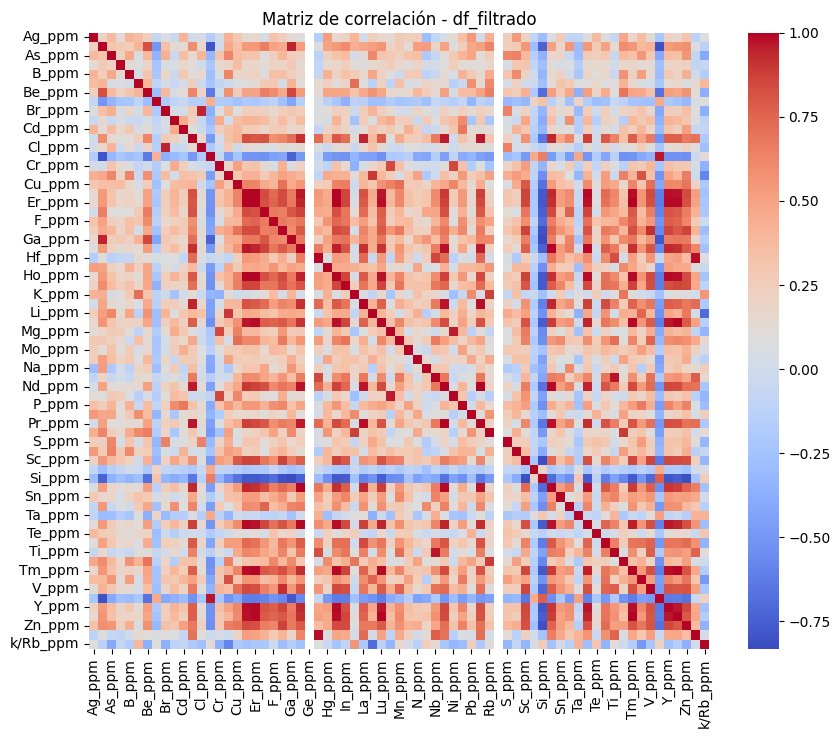

C:\Users\luisx\AppData\Local\Temp\ipykernel_19008\4256437998.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")


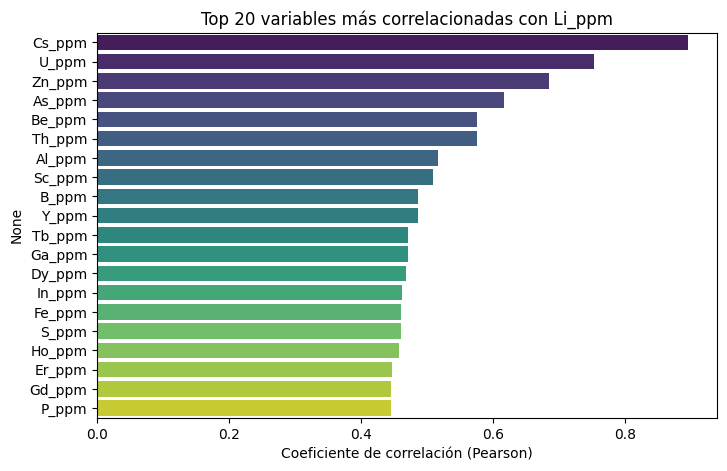

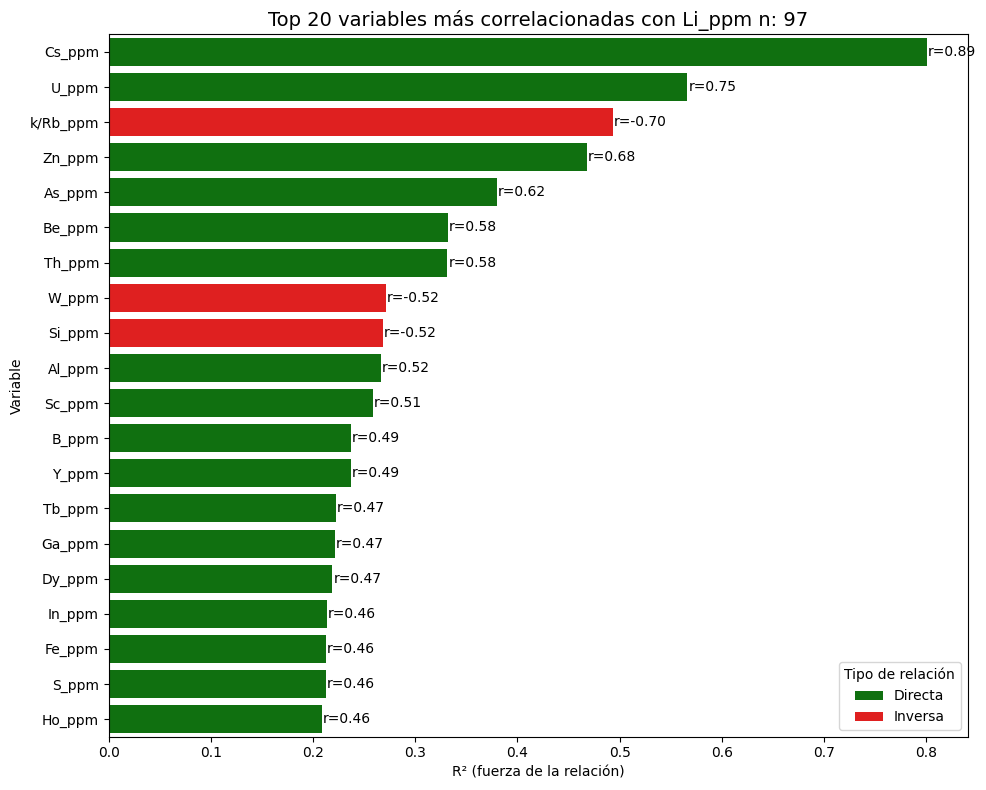

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
# 1. Matriz de correlación
# ============================

df_filtrado = df_limpio[(df_limpio['Municipio']=='URIBIA')].copy()


col_corr = [col for col in df_filtrado.columns if col.endswith('_ppm')]
corr = df_filtrado[col_corr].corr(numeric_only=True)
corr.dropna(how='all', axis=0, inplace=True)

# Correlación con Li_ppm (ordenada)
corr_li = corr['Li_ppm'].sort_values(ascending=False)
print("Correlación de cada variable con Li_ppm:")
print(corr_li)



# ============================
# 2. Heatmap para visualizar
# ============================
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False, cbar=True)
plt.title("Matriz de correlación - df_filtrado")
plt.show()

# ============================
# 3. Top 20 correlaciones
# ============================
# Crear DataFrame con info extra
df_corr = pd.DataFrame({
    "Variable": corr_li.index,
    "Correlación": corr_li.values,
    "R2": corr_li.values**2,
    "Relación": ["Directa" if c > 0 else "Inversa" for c in corr_li.values]
})

# Guardar en CSV
df_corr = df_corr[df_corr['Variable'] != 'Li_ppm'].reset_index(drop=True)  # quitar Li_ppm
df_corr = df_corr.sort_values(by='R2', ascending=False)  # ordenar por R2
df_corr.to_csv('correlacion_li_ppm.csv', sep=';', index=True, decimal=',',encoding='latin1')

top_corr = corr_li[1:21]  # quitamos el mismo Li_ppm que es 1.0
plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title("Top 20 variables más correlacionadas con Li_ppm")
plt.xlabel("Coeficiente de correlación (Pearson)")
plt.show()

# Otra forma usando df_corr

# Tomar las primeras 20 variables
top20 = df_corr.head(20)

# Gráfico de barras
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=top20,
    x="R2",
    y="Variable",
    hue="Relación",      # Directa o Inversa
    dodge=False,
    palette={"Directa": "green", "Inversa": "red"}
)
for i, (r2, corr) in enumerate(zip(top20["R2"], top20["Correlación"])):
    ax.text(
        r2 + 0.001,        # posición en X (un poquito a la derecha de la barra)
        i,                # posición en Y
        f"r={corr:.2f}",  # texto a mostrar
        va="center"
    )


plt.title(f"Top 20 variables más correlacionadas con Li_ppm n: {len(df_filtrado)}", fontsize=14)
plt.xlabel("R² (fuerza de la relación)")
plt.ylabel("Variable")
plt.legend(title="Tipo de relación")
plt.tight_layout()
plt.show()

# Graficos de Dispersión.



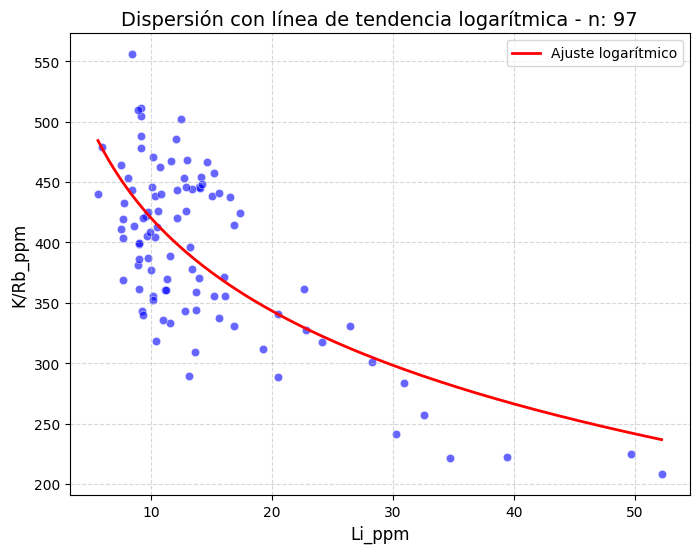

Ecuación: y = 675.96 + -111.05 * ln(x)


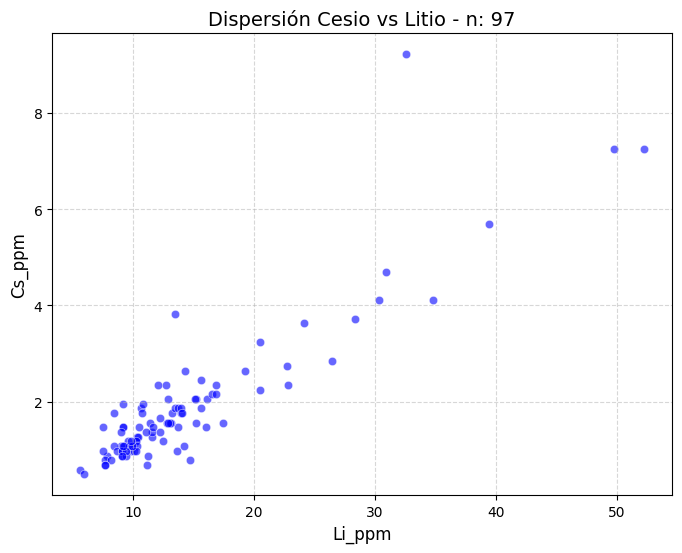

In [15]:
from sklearn.linear_model import LinearRegression

# Extraer variables
X = np.log(df_filtrado['Li_ppm'].values).reshape(-1, 1)  # log(Li_ppm)
y = df_filtrado['k/Rb_ppm'].values.astype(float)         # asegurar float

# Ajustar modelo lineal en log(X)
modelo = LinearRegression()
modelo.fit(X, y)



# Generar puntos para la curva
x_vals = np.linspace(df_filtrado['Li_ppm'].min(), df_filtrado['Li_ppm'].max(), 200)
y_pred = modelo.intercept_ + modelo.coef_[0] * np.log(x_vals)

# Graficar scatter k/Rb_ppm vs Li_ppm
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_filtrado, x='Li_ppm', y='k/Rb_ppm', color='blue', alpha=0.6)
# Graficar línea de tendencia logarítmica
plt.plot(x_vals, y_pred, color='red', linewidth=2, label='Ajuste logarítmico')

# Personalización
plt.title(f'Dispersión con línea de tendencia logarítmica - n: {len(df_filtrado)}', fontsize=14)
plt.xlabel('Li_ppm', fontsize=12)
plt.ylabel('K/Rb_ppm', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

# Mostrar ecuación
print(f"Ecuación: y = {modelo.intercept_:.2f} + {modelo.coef_[0]:.2f} * ln(x)")

# Graficar scatter Cs_ppm vs Li_ppm
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_filtrado, x='Li_ppm', y='Cs_ppm', color='blue', alpha=0.6)
# Personalización
plt.title(f'Dispersión Cesio vs Litio - n: {len(df_filtrado)}', fontsize=14)
plt.xlabel('Li_ppm', fontsize=12)
plt.ylabel('Cs_ppm', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [16]:
df_filtrado.describe()
df_filtrado.info()
df_filtrado.sort_values(by='Li_ppm',inplace=True,ascending=True)
print(f"Número de muestras con concentración de Litio: {len(df_filtrado)}")
print(f"Número de muestras con columnas {len(df_filtrado.columns)}")

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 116604 to 116700
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          97 non-null     int64  
 1   tipo_muestra      97 non-null     object 
 2   tecnica_medicion  97 non-null     object 
 3   Ag_ppm            97 non-null     float64
 4   Al_ppm            97 non-null     float64
 5   As_ppm            97 non-null     float64
 6   Au_ppm            97 non-null     float64
 7   B_ppm             97 non-null     float64
 8   Ba_ppm            97 non-null     float64
 9   Be_ppm            97 non-null     float64
 10  Bi_ppm            97 non-null     float64
 11  Br_ppm            97 non-null     float64
 12  Ca_ppm            97 non-null     float64
 13  Cd_ppm            97 non-null     float64
 14  Ce_ppm            97 non-null     float64
 15  Cl_ppm            97 non-null     float64
 16  Co_ppm            97 non-null     float64


             Modelo        R2      RMSE       MAE       RPD  Overall_Accuracy
0  GradientBoosting  0.922858  1.933941  1.515715  3.600433          0.858049
1      RandomForest  0.902687  2.172123  1.631841  3.205631          0.840567
2               MLP  0.901297  2.187576  1.669285  3.182988          0.839433
3             Ridge  0.878231  2.429781  1.748970  2.865701          0.821655
4             Lasso  0.831802  2.855671  2.057220  2.438315          0.790395


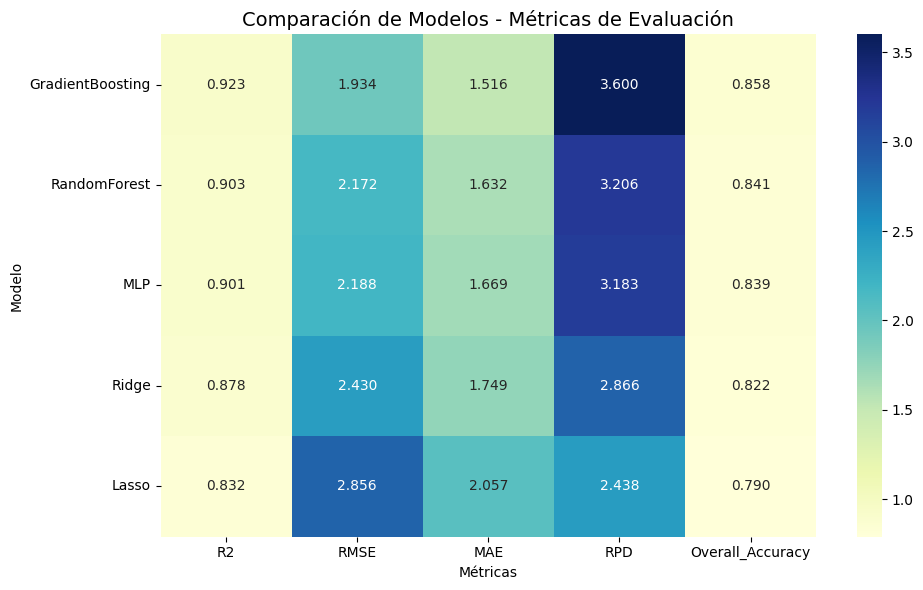

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


features = ["Cs_ppm", "U_ppm",'k/Rb_ppm',"Zn_ppm","As_ppm","Th_ppm","W_ppm"
            ,"Sc_ppm","Y_ppm","Tb_ppm","Ga_ppm","Dy_ppm","In_ppm","Fe_ppm","Ho_ppm","Co_ppm","Er_ppm"
            ]

X = df_filtrado[features]
y = df_filtrado["Li_ppm"]

#print(X.describe())
#print(y.describe())
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modelos a comparar
modelos = {
    "Ridge": Pipeline([("scaler", StandardScaler()), ("modelo", Ridge(alpha=0.3))]),
    "Lasso": Pipeline([("scaler", StandardScaler()), ("modelo", Lasso())]),
    "MLP": Pipeline([("scaler", StandardScaler()), ("modelo", MLPRegressor(max_iter=5000, random_state=42,solver='lbfgs',alpha=10,activation='relu'))]),
    "RandomForest":  RandomForestRegressor(random_state=42, n_estimators=1800,max_features=0.57),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

resultados = []

# Evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    rpd = np.std(y_test) / rmse if rmse > 0 else np.nan
    accuracy = 1 - (rmse / np.mean(y_test))

    resultados.append({
        "Modelo": nombre,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae,
        "RPD": rpd,
        "Overall_Accuracy": accuracy
    })

# Resultados en DataFrame ordenado
df_resultados = pd.DataFrame(resultados).sort_values(by="R2", ascending=False).reset_index(drop=True)
print(df_resultados)

# Normalizar las métricas excepto R2 y Overall Accuracy (para que el color sea comparable)
df_heatmap = df_resultados.set_index("Modelo")

plt.figure(figsize=(10,6))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", fmt=".3f", cbar=True)

plt.title("Comparación de Modelos - Métricas de Evaluación", fontsize=14)
plt.ylabel("Modelo")
plt.xlabel("Métricas")
plt.tight_layout()
plt.show()